In [22]:
import argparse
import GraphLib as gl
from git import Repo

In [110]:
graphLib = gl.GraphLib()

repo = Repo('../Blip.HttpClient')
repo.git.checkout('master')
commits = repo.iter_commits()

while True:
    try:
        commit = next(commits)
        commitFiles = commit.stats.files
        for file in commitFiles:
            file = file.split('/')[-1]
            if not file.endswith('.cs'):
                continue
            for otherFile in commitFiles:
                otherFile = otherFile.split('/')[-1]
                if file == otherFile:
                    continue
                if not otherFile.endswith('.cs'):
                    continue
                graphLib.addEdge(file, otherFile)
    except StopIteration:
        break
        
g = graphLib.graph
removeList = []
for edge in g.edges:
    actualEdge = g[edge[0]][edge[1]]
    if actualEdge['weight'] < 5:
        removeList.append((edge[0], edge[1]))
        removeList.append((edge[1], edge[0]))
g.remove_edges_from(removeList)
g.edges()

removeList = []
for node in g.nodes:
    if sum(1 for neighbor in nx.neighbors(g, node)) <= 1:
        removeList.append(node)
g.remove_nodes_from(removeList)

print('Files most modified together:')
print(graphLib.getHeaviestEdge())
print('Most relationships by file:')
print(graphLib.getMostRelatedNode())

Files most modified together:
(('BroadcastService.cs', 'IBroadcastService.cs'), 18)
Most relationships by file:
('ContactServiceUnitTests.cs', 9)


/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


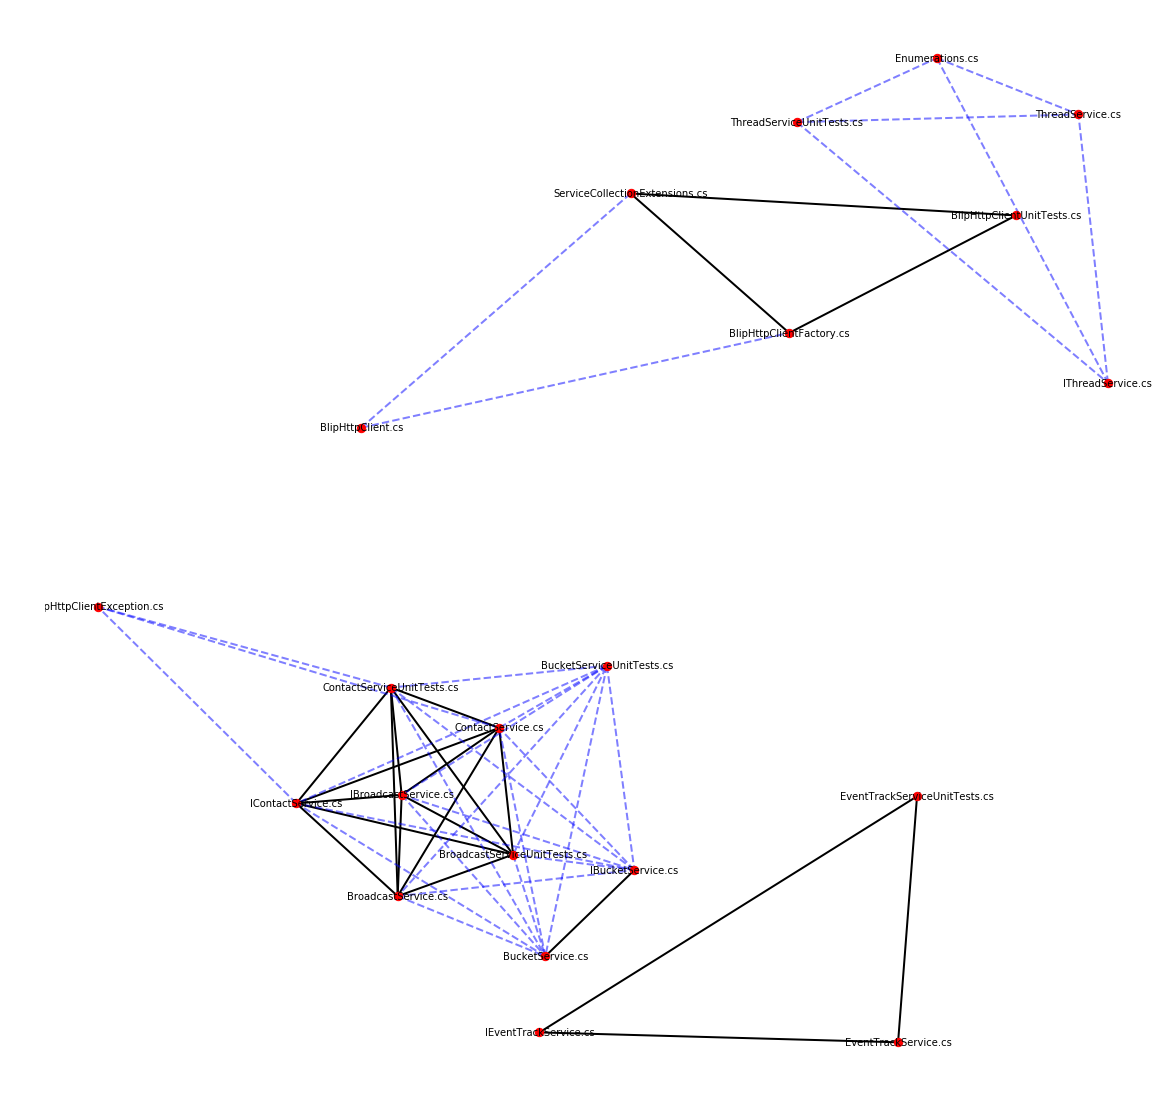

In [111]:
import matplotlib.pyplot as plt
import networkx as nx

fig = plt.figure(figsize=(20, 20))

elarge = [(u, v) for (u, v, d) in g.edges(data=True) if d['weight'] > 7]
esmall = [(u, v) for (u, v, d) in g.edges(data=True) if d['weight'] <= 7]

pos = nx.spring_layout(g, k=2)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(g, pos, node_size=70)

# edges
nx.draw_networkx_edges(g, pos, edgelist=elarge,
                       width=2)
nx.draw_networkx_edges(g, pos, edgelist=esmall,
                       width=2, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(g, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
fig.show()

In [135]:
graphLib = gl.GraphLib()

repo = Repo('../lime-csharp')
repo.git.checkout('master')
commits = repo.iter_commits()

while True:
    try:
        commit = next(commits)
        commitFiles = commit.stats.files
        for file in commitFiles:
            file = file.split('/')[-1]
            if not file.endswith('.cs'):
                continue
            for otherFile in commitFiles:
                otherFile = otherFile.split('/')[-1]
                if file == otherFile:
                    continue
                if not otherFile.endswith('.cs'):
                    continue
                graphLib.addEdge(file, otherFile)
    except StopIteration:
        break
        
g = graphLib.graph
removeList = []
for edge in g.edges:
    actualEdge = g[edge[0]][edge[1]]
    if actualEdge['weight'] < 25:
        removeList.append((edge[0], edge[1]))
        removeList.append((edge[1], edge[0]))
g.remove_edges_from(removeList)
g.edges()

listSize = 0
weightList = []
for edge in g.edges:
    actualEdge = g[edge[0]][edge[1]]
    if actualEdge['weight'] in weightList:
        continue
    else:
        weightList.append(actualEdge['weight'])
        listSize += 1
medianIndex = int(listSize/2)
median = sorted(weightList)[medianIndex]
print(median)
print(sorted(weightList))
removeList = []
#for edge in g.edges:
##    actualEdge = g[edge[0]][edge[1]]
#    if actualEdge['weight'] < 50:
#        removeList.append((edge[0], edge[1]))
#        removeList.append((edge[1], edge[0]))
#g.remove_edges_from(removeList)

removeList = []
for node in g.nodes:
    if sum(1 for neighbor in nx.neighbors(g, node)) <= 1:
        removeList.append(node)
g.remove_nodes_from(removeList)

60
[26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 82, 84, 90, 96, 100, 114, 128]


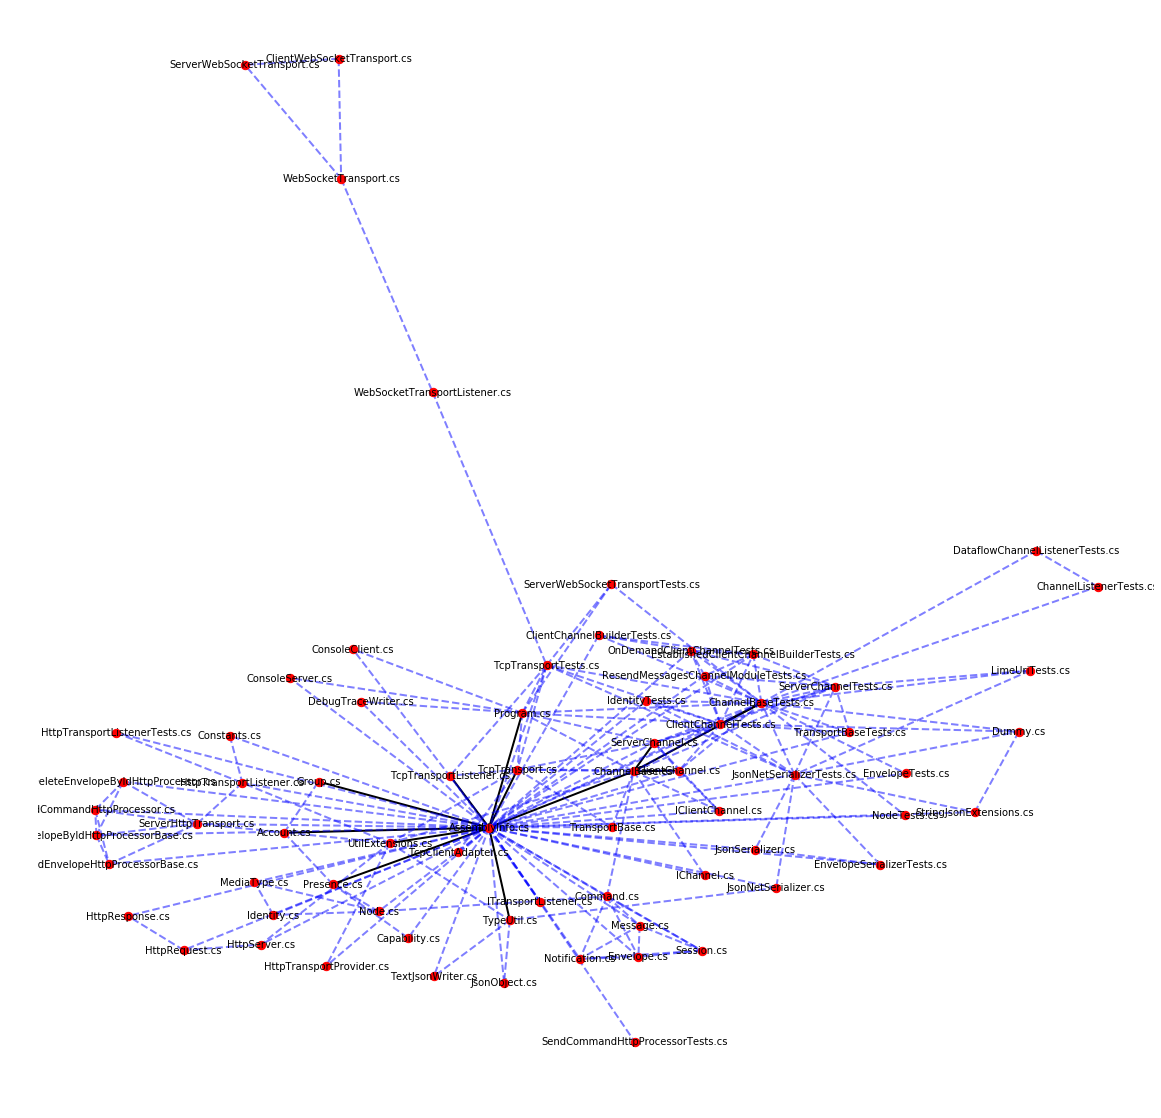

In [137]:
import matplotlib.pyplot as plt
import networkx as nx

newList = sorted(weightList[medianIndex:])
newIndex = int(listSize/4)
newMedian = newList[newIndex]
fig = plt.figure(figsize=(20, 20))

elarge = [(u, v) for (u, v, d) in g.edges(data=True) if d['weight'] > 75]
esmall = [(u, v) for (u, v, d) in g.edges(data=True) if d['weight'] <= 75]

pos = nx.spring_layout(g, k=0.5)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(g, pos, node_size=70)

# edges
nx.draw_networkx_edges(g, pos, edgelist=elarge,
                       width=2)
nx.draw_networkx_edges(g, pos, edgelist=esmall,
                       width=2, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(g, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
fig.show()